In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


In [2]:
# Read in the data
df = pd.read_csv('movies.csv')

#Look into the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#See if there are any missing data

for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{}.{}%'.format(col,missing_values))

name.0.0%
rating.0.010041731872717789%
genre.0.0%
year.0.0%
released.0.0002608242044861763%
score.0.0003912363067292645%
votes.0.0003912363067292645%
director.0.0%
writer.0.0003912363067292645%
star.0.00013041210224308815%
country.0.0003912363067292645%
budget.0.2831246739697444%
gross.0.02464788732394366%
company.0.002217005738132499%
runtime.0.0005216484089723526%


In [4]:

df['score'].fillna(df['score'].mean(), inplace=True)
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)



In [5]:

for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{}.{}%'.format(col,missing_values))

name.0.0%
rating.0.010041731872717789%
genre.0.0%
year.0.0%
released.0.0002608242044861763%
score.0.0%
votes.0.0%
director.0.0%
writer.0.0003912363067292645%
star.0.00013041210224308815%
country.0.0003912363067292645%
budget.0.0%
gross.0.0%
company.0.002217005738132499%
runtime.0.0%


In [6]:
df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7666,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
#Check data type of columns
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df['budget'] = df['budget'].astype('int64')

In [9]:
df['gross'] = df['gross'].astype('int64')

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.000000
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.000000


In [12]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [14]:
#pd.set_options('display.max_rows', None)

In [23]:
#Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.000000
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,NaN,90.000000
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.000000


In [ ]:
# Budget high correlation
# company high correlation

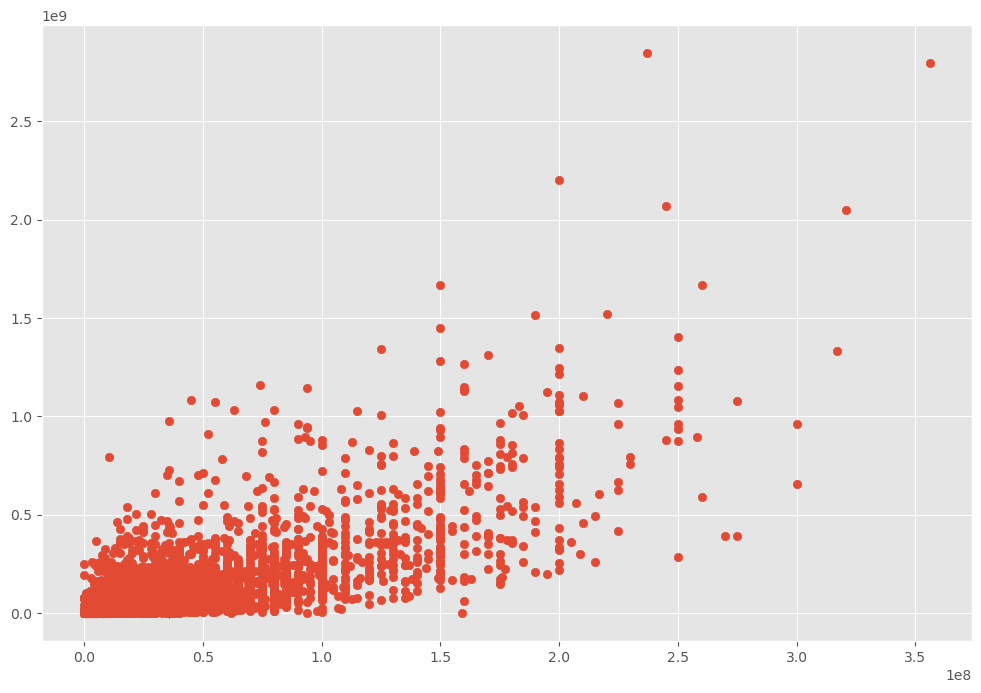

In [22]:
#scatter plot with budget vs ravenue
plt.scatter(x=df['budget'], y=df['gross'])

<AxesSubplot:xlabel='budget', ylabel='gross'>

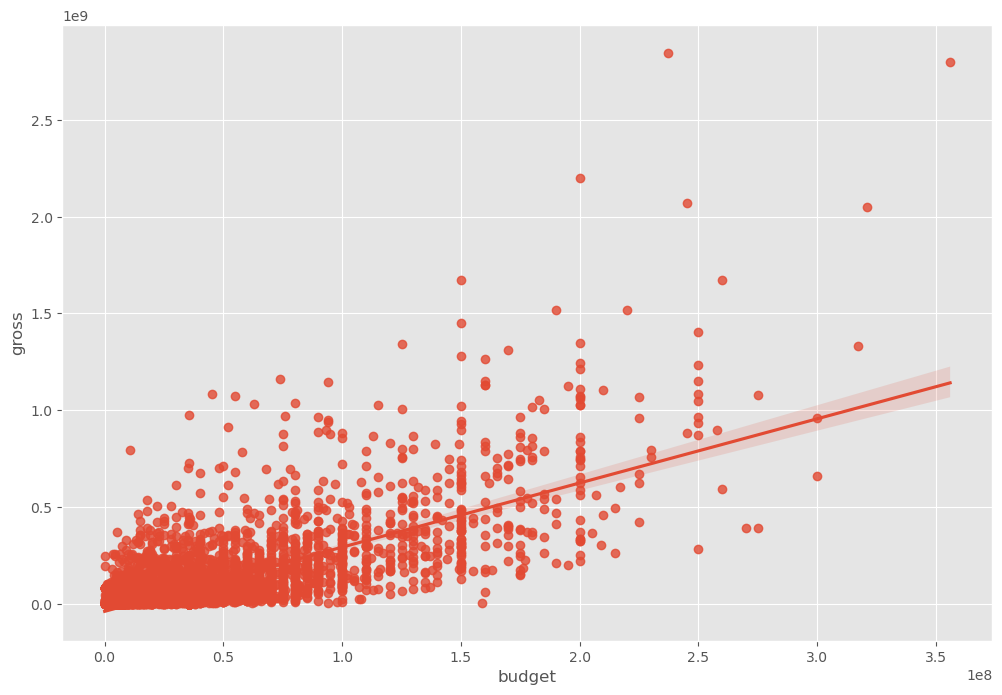

In [26]:
sns.regplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

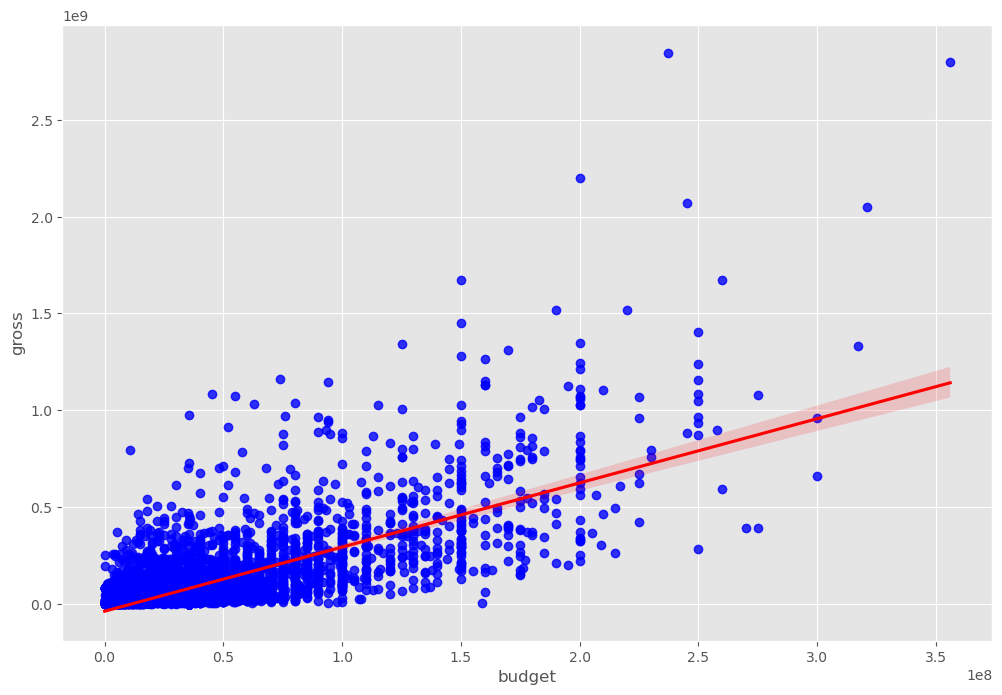

In [31]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

In [32]:
#Lets check corr

In [37]:
df.corr(method='pearson')#Methods of correlation: pearson, kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [38]:
#High correlation betwen gross and budget

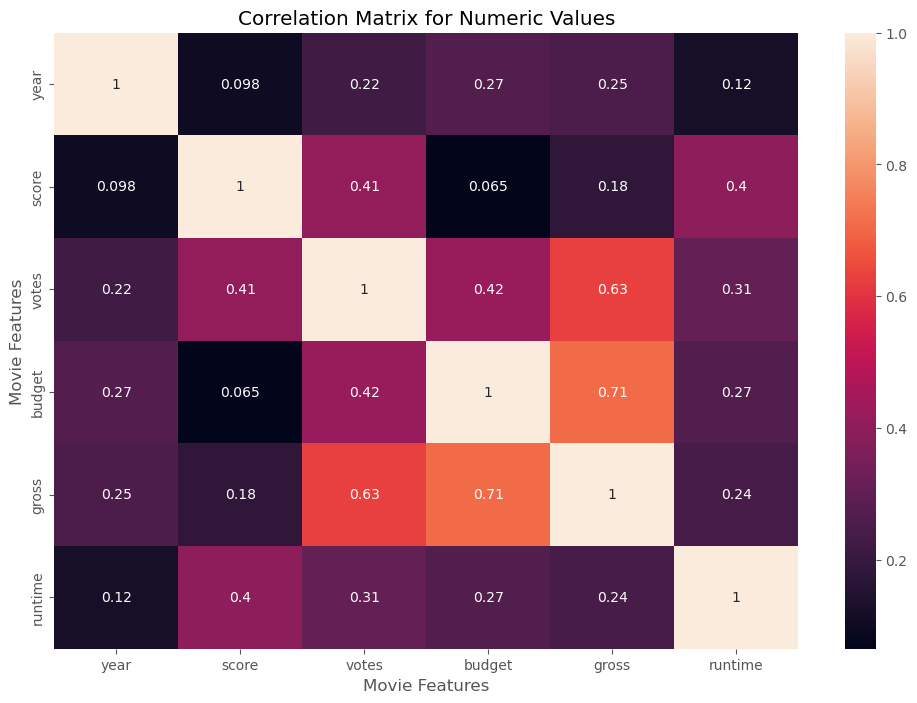

In [40]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [43]:
df_numerized = df
for colname in df_numerized.columns:
    if(df_numerized[colname].dtype=='object'):
        df_numerized[colname]=df_numerized[colname].astype('category')
        df_numerized[colname]=df_numerized[colname].cat.codes
df_numerized     
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.400000,9.270000e+05,2589,4014,1047,54,19000000,46998772,2319,146.000000
1,5573,6,1,1980,1492,5.800000,6.500000e+04,2269,1632,327,55,4500000,58853106,731,104.000000
2,5142,4,0,1980,1771,8.700000,1.200000e+06,1111,2567,1745,55,18000000,538375067,1540,124.000000
3,286,4,4,1980,1492,7.700000,2.210000e+05,1301,2000,2246,55,3500000,83453539,1812,88.000000
4,1027,6,4,1980,1543,7.300000,1.080000e+05,1054,521,410,55,6000000,39846344,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.100000,1.800000e+01,1500,2289,2421,55,7000,78500541,-1,90.000000
7664,1678,-1,4,2020,1107,4.700000,3.600000e+01,774,2614,1886,55,35589876,78500541,-1,90.000000
7665,4717,-1,6,2020,193,5.700000,2.900000e+01,2061,2683,2040,55,58750,78500541,941,107.261613
7666,2843,-1,6,2020,2817,6.390411,8.810850e+04,1184,1824,450,55,15000,78500541,-1,120.000000


In [44]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.400000,9.270000e+05,2589,4014,1047,54,19000000,46998772,2319,146.000000
1,5573,6,1,1980,1492,5.800000,6.500000e+04,2269,1632,327,55,4500000,58853106,731,104.000000
2,5142,4,0,1980,1771,8.700000,1.200000e+06,1111,2567,1745,55,18000000,538375067,1540,124.000000
3,286,4,4,1980,1492,7.700000,2.210000e+05,1301,2000,2246,55,3500000,83453539,1812,88.000000
4,1027,6,4,1980,1543,7.300000,1.080000e+05,1054,521,410,55,6000000,39846344,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.100000,1.800000e+01,1500,2289,2421,55,7000,78500541,-1,90.000000
7664,1678,-1,4,2020,1107,4.700000,3.600000e+01,774,2614,1886,55,35589876,78500541,-1,90.000000
7665,4717,-1,6,2020,193,5.700000,2.900000e+01,2061,2683,2040,55,58750,78500541,941,107.261613
7666,2843,-1,6,2020,2817,6.390411,8.810850e+04,1184,1824,450,55,15000,78500541,-1,120.000000


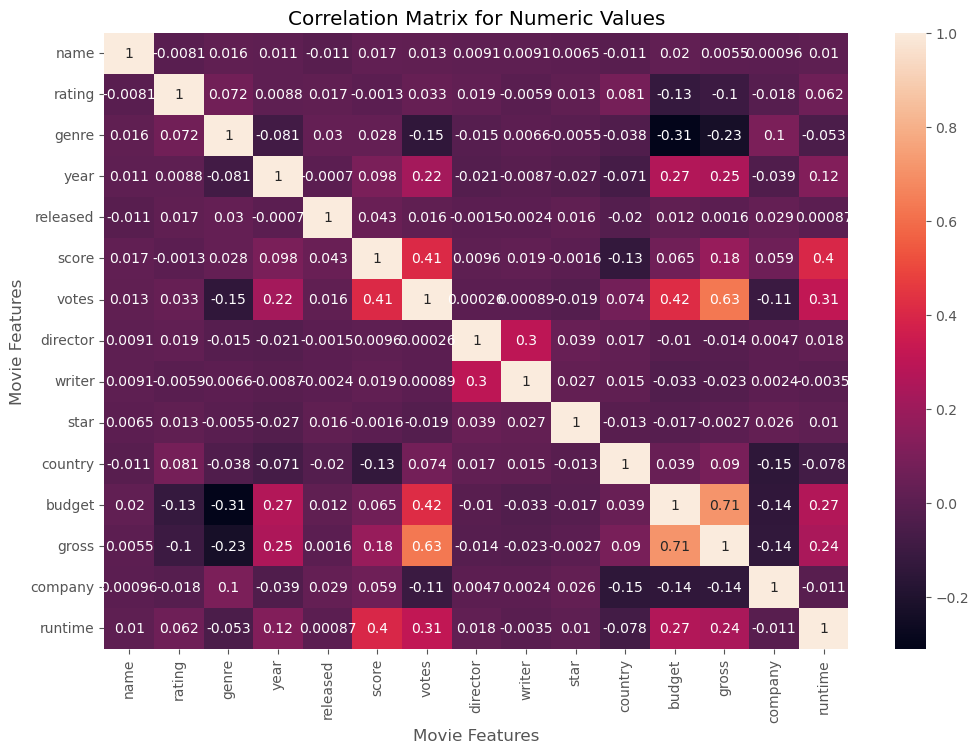

In [45]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [46]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017095,0.013086,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.000961,0.010390
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001310,0.033127,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.018387,0.062051
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027959,-0.145276,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,0.099779,-0.052699
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097936,0.222810,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.038516,0.120766
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042779,0.016094,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,0.028690,0.000867
score,0.017095,-0.001310,0.027959,0.097936,0.042779,1.000000,0.409182,0.009559,0.019410,-0.001609,-0.133343,0.064541,0.182868,0.059239,0.399329
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.409182,1.000000,0.000260,0.000891,-0.019277,0.073622,0.421007,0.628713,-0.109974,0.309166
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004740,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019410,0.000891,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.002383,-0.003510
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019277,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.025543,0.010171


In [47]:
correlation_mat=df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078297
         budget      0.265287
         gross       0.241335
         company    -0.010532
         runtime     1.000000
Length: 225, dtype: float64

In [49]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.310566
genre    budget    -0.310566
         gross     -0.230267
gross    genre     -0.230267
country  company   -0.150228
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [50]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
                        

In [51]:
high_corr

votes     gross       0.628713
gross     votes       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [52]:
#Votes and budget have the highest corrrelation to gross earnings
#Company has low correlation
#Hypothesis was wrong